In [22]:
import torch
from PIL import Image
from diffusers import AutoencoderKL
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [23]:
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [24]:
path_to_image = 'path/to/image.jpg'
image = Image.open(path_to_image)

transform = transforms.ToTensor()

image = transform(image).unsqueeze(0)

In [25]:
def encode_img(input_img):
    if len(input_img.shape)<4:
        input_img = input_img.unsqueeze(0)
    with torch.no_grad():
        latent = vae.encode(input_img*2 - 1)
    return 0.18215 * latent.latent_dist.sample()


def decode_img(latents):
    latents = (1 / 0.18215) * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach()
    return image


In [26]:
latent = encode_img(image)
decoded_image = decode_img(latent.to(torch.float32))

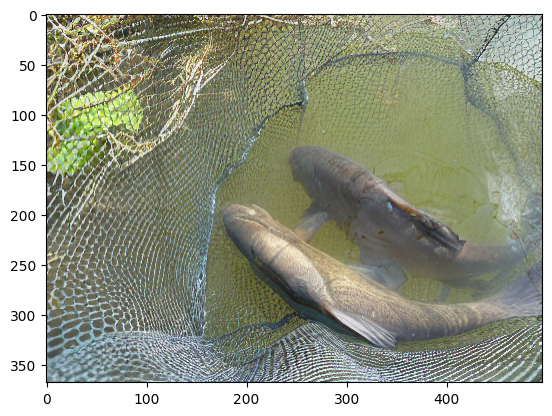

In [27]:
plt.imshow(decoded_image[0].permute(1, 2, 0))
plt.show()

### Decode from latents

In [20]:
latent_path = 'path/to/latent.npy'
latent = torch.tensor(np.load(latent_path)).to(torch.float32)
decoded_image = decode_img(latent.unsqueeze(0))

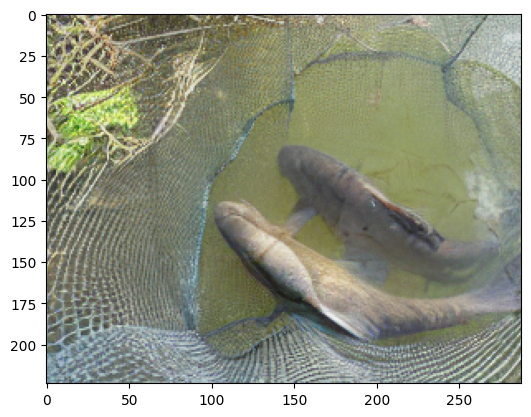

In [21]:
plt.imshow(decoded_image[0].permute(1, 2, 0))
plt.show()